In [16]:
# Import useful libraries
import gdeltxp
import gdeltviz
import operator
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import isnan
from datetime import datetime
from collections import Counter, OrderedDict
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

In [3]:
twitter_data = pd.read_csv('C:/Users/Administrator/Dropbox/TWITTER/twitter_data.csv').sort_values('Timestamp', ascending=1)

In [5]:
ArrTime = [0]
times = sorted(list(twitter_data.Timestamp))
for i in range(len(list(twitter_data.Timestamp))-1):
    d1 = datetime.strptime(times[i], '%Y-%m-%d %H:%M:%S') 
    d2 = datetime.strptime(times[i+1], '%Y-%m-%d %H:%M:%S') 
    delta = (d2 - d1).seconds
    if delta < 300:
        ArrTime.append(delta)
    else:
        ArrTime.append(0)        
twitter_data['ArrTime'] = ArrTime

In [6]:
twitter_data.head(10)

,Timestamp,UserID,RT,Fav,TweetLen,PosWords,NegWords,ArrTime
2711232,2016-09-11 22:25:14,775097898329571328,0,0.0,18,0,0,0
2711233,2016-09-11 22:25:15,775097901836009472,9,13.0,25,0,0,1
2711234,2016-09-11 22:25:16,775097906751741952,0,0.0,27,0,0,1
2711235,2016-09-11 22:25:18,775097917514387456,0,0.0,5,0,0,2
2711238,2016-09-11 22:25:19,775097921570234369,2,2.0,29,0,0,1
2711236,2016-09-11 22:25:19,775097919519285248,0,0.0,22,0,0,0
2711237,2016-09-11 22:25:19,775097921045929984,0,0.0,22,0,0,0
2711239,2016-09-11 22:25:21,775097927849181184,944,492.0,26,0,0,2
2711240,2016-09-11 22:25:21,775097928222437376,0,0.0,25,0,0,0
2711241,2016-09-11 22:25:22,775097931384881152,5,3.0,27,0,0,1


In [7]:
print('Tweets: ', len(twitter_data))
print('RT: ', len(twitter_data[twitter_data.RT > 0]))
print('Fav: ', len(twitter_data[twitter_data.Fav > 0]))
print('Users: ', len(set(twitter_data.UserID)))

Tweets:  3644464
RT:  2524880
Fav:  2187191
Users:  3642614


In [8]:
Counter(twitter_data.UserID).most_common(10)

[(778668612181688323, 4),
 (778668612504653824, 4),
 (778668449245519873, 4),
 (778668618129235968, 4),
 (797562877456580608, 3),
 (786628347644084224, 3),
 (778668630661881856, 3),
 (778668271562260480, 3),
 (782795345667452928, 3),
 (783038425372975104, 3)]

In [9]:
for index, row in twitter_data.iterrows():
    twitter_data.set_value(index, 'Timestamp', int(row.Timestamp[:10].replace('-','')))

In [8]:
twitter_data.head(10)

,Timestamp,UserID,RT,Fav,ArrTime
2819889,20160911,775097898329571328,0,0.0,0
2819890,20160911,775097901836009472,9,13.0,1
2819891,20160911,775097906751741952,0,0.0,1
2819892,20160911,775097917514387456,0,0.0,2
2819895,20160911,775097921570234369,2,2.0,1
2819893,20160911,775097919519285248,0,0.0,0
2819894,20160911,775097921045929984,0,0.0,0
2819896,20160911,775097927849181184,944,492.0,2
2819897,20160911,775097928222437376,0,0.0,0
2819898,20160911,775097931384881152,5,3.0,1


In [10]:
twitter_df = pd.concat([twitter_data.groupby('Timestamp')['AvgArrTime', 'AvgTweetLen'].mean(), twitter_data.groupby('Timestamp')['RT', 'Fav', 'PosWords', 'NegWords'].sum()], axis=1)

In [11]:
tweet_counts = []
for date in list(twitter_df.index):
    tweet_counts.append(len(twitter_data[twitter_data.Timestamp == date]))
twitter_df['Tweets'] = tweet_counts

In [12]:
twitter_df.head(10)

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets
Timestamp,,,,,,,
20160911,1.303141,24.457235,287660,164738.0,258,45,4361
20160912,1.905219,24.494482,4532694,3086731.0,2942,739,36062
20160913,1.582499,25.076207,4915644,3052886.0,4295,1334,48867
20160914,2.330357,25.037506,2883815,2056129.0,2612,525,31808
20160915,2.455231,24.959742,1670461,1061135.0,1612,448,20170
20160916,1.928800,24.219481,2159568,1390254.0,2409,687,40295
20160917,1.853025,23.876874,2534144,1698023.0,3128,1094,46627
20160918,2.065924,24.307525,2232602,1534565.0,2876,604,41821
20160919,1.581708,24.358969,3513855,2132814.0,3880,807,53740


In [30]:
fav = scaler.fit_transform(list(twitter_df.Fav))
rt = scaler.fit_transform(list(twitter_df.RT))
tweets = scaler.fit_transform(list(twitter_df.Tweets))
PI = []
for i in range(len(tweets)):
    PI.append((fav[i]*rt[i]*tweets[i])**(1./3.))
twitter_df['PI'] = PI

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [31]:
twitter_df.head(10)

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,PI
Timestamp,,,,,,,,
20160911,1.303141,24.457235,287660,164738.0,258,45,4361,0.001555
20160912,1.905219,24.494482,4532694,3086731.0,2942,739,36062,0.029691
20160913,1.582499,25.076207,4915644,3052886.0,4295,1334,48867,0.033725
20160914,2.330357,25.037506,2883815,2056129.0,2612,525,31808,0.021197
20160915,2.455231,24.959742,1670461,1061135.0,1612,448,20170,0.011888
20160916,1.928800,24.219481,2159568,1390254.0,2409,687,40295,0.018156
20160917,1.853025,23.876874,2534144,1698023.0,3128,1094,46627,0.021623
20160918,2.065924,24.307525,2232602,1534565.0,2876,604,41821,0.019250
20160919,1.581708,24.358969,3513855,2132814.0,3880,807,53740,0.027476


In [36]:
del twitter_df['Fav']
del twitter_df['RT']
del twitter_df['Tweets']
twitter_df.head(10)

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20160911,1.303141,24.457235,258,45,0.001555
20160912,1.905219,24.494482,2942,739,0.029691
20160913,1.582499,25.076207,4295,1334,0.033725
20160914,2.330357,25.037506,2612,525,0.021197
20160915,2.455231,24.959742,1612,448,0.011888
20160916,1.928800,24.219481,2409,687,0.018156
20160917,1.853025,23.876874,3128,1094,0.021623
20160918,2.065924,24.307525,2876,604,0.019250
20160919,1.581708,24.358969,3880,807,0.027476


# Inter-arrival Time

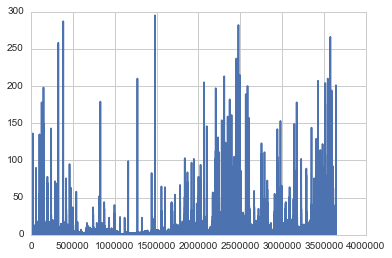

In [37]:
plt.plot(ArrTime)

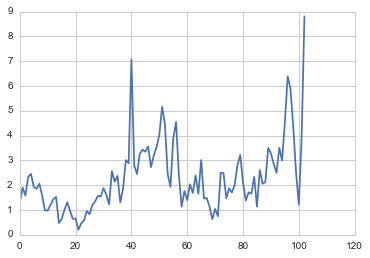

In [38]:
plt.plot(list(twitter_df.ArrTime))

In [39]:
twitter_df[twitter_df.ArrTime <= .7]

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20160926,0.471562,23.873653,6026,2391,0.058495
20160927,0.635701,24.402781,7593,6838,0.072720
20161001,0.640343,23.997824,4088,562,0.031183
20161002,0.660496,24.090385,4776,1460,0.048883
20161003,0.204606,24.223281,17581,14317,0.363053
20161004,0.460389,24.268042,3165,1442,0.055491
20161005,0.579295,24.332754,13033,2482,0.107797
20161124,0.627210,23.613911,752,433,0.013610


In [40]:
twitter_df[twitter_df.ArrTime == twitter_df.ArrTime.min()]

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20161003,0.204606,24.223281,17581,14317,0.363053


In [41]:
twitter_df.ArrTime.mean() - twitter_df.ArrTime.std()

0.855808641708149

# Tweet Length

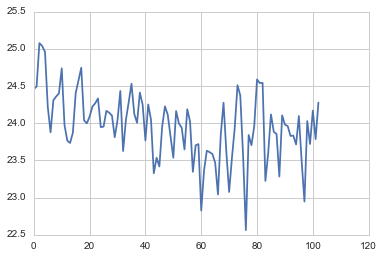

In [43]:
plt.plot(list(twitter_df.TweetLen))

In [44]:
pd.concat([twitter_df[twitter_df['TweetLen'] >= 24.5], twitter_df[twitter_df['TweetLen'] <=23]])

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20160913,1.582499,25.076207,4295,1334,0.033725
20160914,2.330357,25.037506,2612,525,0.021197
20160915,2.455231,24.959742,1612,448,0.011888
20160921,0.977313,24.737155,1016,255,0.008339
20160928,1.006772,24.572752,5583,1573,0.047037
20160929,1.313782,24.745501,4470,892,0.037288
20161017,2.373061,24.530482,2367,607,0.023510
20161128,2.492040,24.510832,2382,1198,0.031273
20161205,2.092232,24.588067,2256,1184,0.022634


In [46]:
twitter_df.TweetLen.mean()

23.96526407651833

# Positive Words

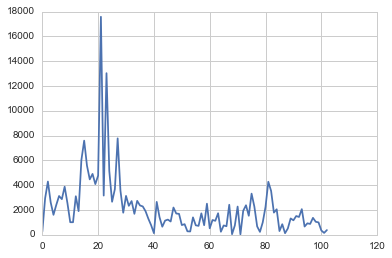

In [47]:
plt.plot(list(twitter_df.PosWords))
#plt.yscale('log')

In [52]:
twitter_df[twitter_df.PosWords >= 6e3]

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20160926,0.471562,23.873653,6026,2391,0.058495
20160927,0.635701,24.402781,7593,6838,0.072720
20161003,0.204606,24.223281,17581,14317,0.363053
20161005,0.579295,24.332754,13033,2482,0.107797
20161009,1.346493,24.141167,7776,1288,0.044155


In [53]:
twitter_df[twitter_df.PosWords == twitter_df.PosWords.max()]

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20161003,0.204606,24.223281,17581,14317,0.363053


# Negative Words

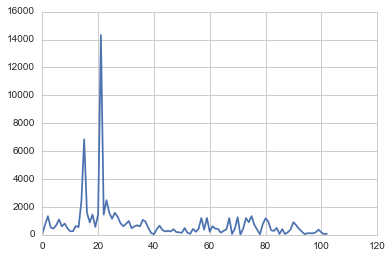

In [54]:
plt.plot(list(twitter_df.NegWords))
#plt.yscale('log')

In [55]:
twitter_df[twitter_df.NegWords >= 4e3]

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20160927,0.635701,24.402781,7593,6838,0.072720
20161003,0.204606,24.223281,17581,14317,0.363053


In [56]:
twitter_df[twitter_df.NegWords == twitter_df.NegWords.max()]

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20161003,0.204606,24.223281,17581,14317,0.363053


# Perceived Importance

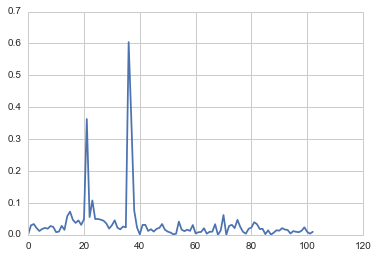

In [58]:
plt.plot(list(twitter_df.PI))

In [62]:
twitter_df[twitter_df.PI >= .045]

,ArrTime,TweetLen,PosWords,NegWords,PI
Timestamp,,,,,
20160926,0.471562,23.873653,6026,2391,0.058495
20160927,0.635701,24.402781,7593,6838,0.072720
20160928,1.006772,24.572752,5583,1573,0.047037
20160930,0.964286,24.038426,4911,1450,0.045178
20161002,0.660496,24.090385,4776,1460,0.048883
20161003,0.204606,24.223281,17581,14317,0.363053
20161004,0.460389,24.268042,3165,1442,0.055491
20161005,0.579295,24.332754,13033,2482,0.107797
20161006,0.955090,23.946879,5155,1583,0.049413


In [57]:
del twitter_data

# GDELT

In [64]:
events_data = gdelt = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/all_events.csv').sort_values('SQLDATE', ascending=1)

In [65]:
events_data.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
752,577907499,20160911,201609,2016,2016.6877,COL,COLOMBIA,COL,NaN,NaN,...,4,"Cartagena, Bolír, Colombia",CO,CO35,13503,10.3997,-75.5144,-579943,20160911041500,http://www.24horas.cl/internacional/las-farc-e...
243,577911153,20160911,201609,2016,2016.6877,COLREB,FARC,COL,NaN,NaN,...,4,"Bogota, Cundinamarca, Colombia",CO,CO33,18585,4.6000,-74.0833,-578472,20160911044500,http://colombia2020.elespectador.com/pais/ni-e...
242,577911150,20160911,201609,2016,2016.6877,COL,COLOMBIA,COL,NaN,NaN,...,4,"Bogota, Cundinamarca, Colombia",CO,CO33,18585,4.6000,-74.0833,-578472,20160911044500,http://colombia2020.elespectador.com/pais/ni-e...
239,578066453,20160911,201609,2016,2016.6877,COLGOV,COLOMBIA,COL,NaN,NaN,...,1,Colombia,CO,CO,NaN,4.0000,-72.0000,CO,20160911230000,http://www.wsj.com/articles/takedown-of-a-cand...
238,578066450,20160911,201609,2016,2016.6877,COL,COLOMBIA,COL,NaN,NaN,...,1,Colombia,CO,CO,NaN,4.0000,-72.0000,CO,20160911230000,http://www.wsj.com/articles/takedown-of-a-cand...


In [66]:
#twitter_df = pd.concat([twitter_data.groupby('Timestamp')['ArrTime'].mean(), twitter_data.groupby('Timestamp')['RT', 'Fav'].sum()], axis=1)
df1 = events_data[(events_data['SQLDATE'] >= 20160911) & (events_data['SQLDATE'] <= 20161231)].groupby('SQLDATE')['AvgTone','GoldsteinScale'].mean()
df2 = events_data[(events_data['SQLDATE'] >= 20160911) & (events_data['SQLDATE'] <= 20161231)].groupby('SQLDATE')['NumMentions','NumSources', 'NumArticles'].sum()

In [67]:
df1.head(10)

,AvgTone,GoldsteinScale
SQLDATE,,
20160911,-0.504049,4.239474
20160912,-1.960844,3.279487
20160913,-0.668595,2.845806
20160914,0.126425,2.770803
20160915,-0.974327,2.219672
20160916,-0.215027,2.700000
20160917,0.133101,2.895050
20160918,0.154699,2.526724
20160919,-0.081255,3.193421


In [68]:
df2.head(10)

,NumMentions,NumSources,NumArticles
SQLDATE,,,
20160911,884,117,798
20160912,726,124,724
20160913,1143,163,1059
20160914,1098,192,1066
20160915,711,135,707
20160916,1116,168,1099
20160917,1543,249,1449
20160918,812,123,694
20160919,1115,180,976


In [69]:
events_df = pd.concat([df1,df2], axis=1)
#events_df = df2
events_df.head(10)

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles
SQLDATE,,,,,
20160911,-0.504049,4.239474,884,117,798
20160912,-1.960844,3.279487,726,124,724
20160913,-0.668595,2.845806,1143,163,1059
20160914,0.126425,2.770803,1098,192,1066
20160915,-0.974327,2.219672,711,135,707
20160916,-0.215027,2.700000,1116,168,1099
20160917,0.133101,2.895050,1543,249,1449
20160918,0.154699,2.526724,812,123,694
20160919,-0.081255,3.193421,1115,180,976


In [70]:
event_counts = []
for date in sorted(list(set(events_data[events_data.SQLDATE <= 20161231].SQLDATE))):
    event_counts.append(len(events_data[events_data.SQLDATE == date]))
events_df['Events'] = event_counts

In [71]:
events_df.head(10)

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160911,-0.504049,4.239474,884,117,798,114
20160912,-1.960844,3.279487,726,124,724,117
20160913,-0.668595,2.845806,1143,163,1059,155
20160914,0.126425,2.770803,1098,192,1066,137
20160915,-0.974327,2.219672,711,135,707,122
20160916,-0.215027,2.700000,1116,168,1099,153
20160917,0.133101,2.895050,1543,249,1449,202
20160918,0.154699,2.526724,812,123,694,116
20160919,-0.081255,3.193421,1115,180,976,152


# GDELT Tone

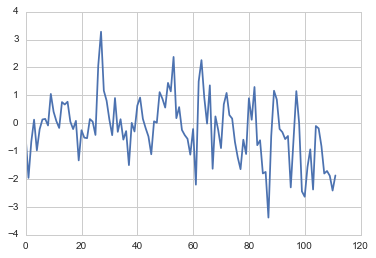

In [72]:
plt.plot(list(events_df.AvgTone))
#plt.yscale('log')

In [73]:
pd.concat([events_df[events_df['AvgTone'] >= 2], events_df[events_df['AvgTone'] <= -3]])

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20161007,2.059901,2.140568,3731,631,3399,493
20161008,3.278853,2.229044,1786,306,1761,272
20161103,2.376222,2.419091,763,133,731,110
20161113,2.260703,2.938403,2256,284,1984,263
20161207,-3.381935,0.594444,286,55,274,54


In [74]:
events_df.AvgTone.describe()

count    112.000000
mean      -0.203443
std        1.135571
min       -3.381935
25%       -0.702149
50%       -0.196618
75%        0.564371
max        3.278853
Name: AvgTone, dtype: float64

# Goldstein Scale

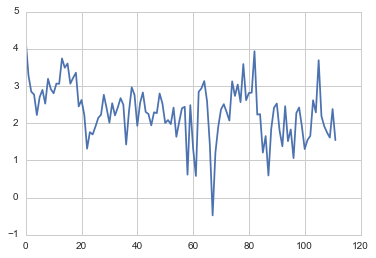

In [75]:
plt.plot(list(events_df.GoldsteinScale))

In [76]:
pd.concat([events_df[events_df['GoldsteinScale'] >= 3.5], events_df[events_df['GoldsteinScale'] <=1]])

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160911,-0.504049,4.239474,884,117,798,114
20160924,0.756706,3.741333,1481,250,1342,225
20160926,0.768593,3.603692,4130,728,3905,650
20161128,-0.590881,3.590667,500,91,484,75
20161202,1.298378,3.935664,797,152,779,143
20161225,-0.186705,3.692308,94,13,94,13
20161108,-0.560158,0.617808,495,74,451,73
20161111,-2.202536,0.581481,400,65,380,54
20161117,-1.632075,-0.478035,1336,204,1233,173


In [77]:
events_df.GoldsteinScale.describe()

count    112.000000
mean       2.320855
std        0.737388
min       -0.478035
25%        1.909360
50%        2.390244
75%        2.777635
max        4.239474
Name: GoldsteinScale, dtype: float64

# NumMentions

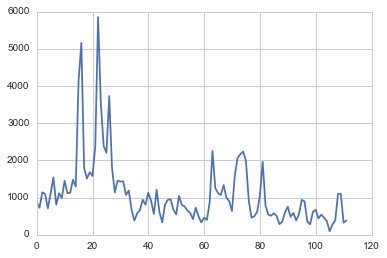

In [78]:
plt.plot(list(events_df.NumMentions))

In [79]:
events_df[events_df['NumMentions'] >= 2000]

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160926,0.768593,3.603692,4130,728,3905,650
20160927,0.055893,3.062816,5156,858,4760,632
20161002,-0.517625,2.225249,2392,336,2260,301
20161003,-0.536448,1.315686,5852,834,5533,765
20161004,0.148161,1.759144,3523,550,3259,514
20161005,0.057687,1.697832,2390,400,2225,369
20161006,-0.421545,1.908672,2207,416,2056,369
20161007,2.059901,2.140568,3731,631,3399,493
20161113,2.260703,2.938403,2256,284,1984,263


# NumSources

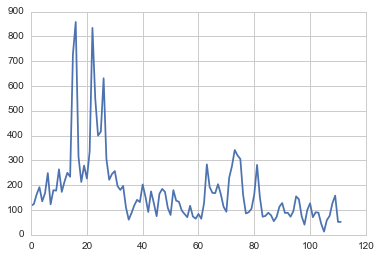

In [80]:
plt.plot(list(events_df.NumSources))

In [81]:
events_df[events_df['NumSources'] >= 300]

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160926,0.768593,3.603692,4130,728,3905,650
20160927,0.055893,3.062816,5156,858,4760,632
20160928,-0.210844,3.220205,1797,315,1734,292
20161002,-0.517625,2.225249,2392,336,2260,301
20161003,-0.536448,1.315686,5852,834,5533,765
20161004,0.148161,1.759144,3523,550,3259,514
20161005,0.057687,1.697832,2390,400,2225,369
20161006,-0.421545,1.908672,2207,416,2056,369
20161007,2.059901,2.140568,3731,631,3399,493


# NumArticles

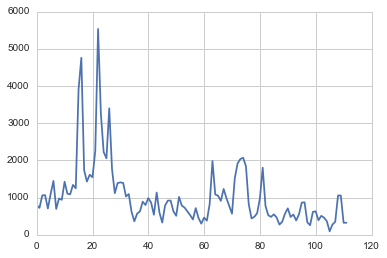

In [82]:
plt.plot(list(events_df.NumArticles))

In [83]:
events_df[events_df['NumArticles'] >= 2000]

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160926,0.768593,3.603692,4130,728,3905,650
20160927,0.055893,3.062816,5156,858,4760,632
20161002,-0.517625,2.225249,2392,336,2260,301
20161003,-0.536448,1.315686,5852,834,5533,765
20161004,0.148161,1.759144,3523,550,3259,514
20161005,0.057687,1.697832,2390,400,2225,369
20161006,-0.421545,1.908672,2207,416,2056,369
20161007,2.059901,2.140568,3731,631,3399,493
20161123,0.293193,2.071103,2165,342,2038,263


# Events

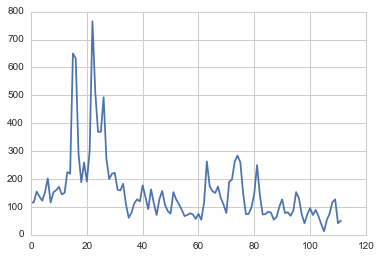

In [84]:
plt.plot(list(events_df.Events))

In [85]:
events_df[events_df['Events'] >= 275]

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160926,0.768593,3.603692,4130,728,3905,650
20160927,0.055893,3.062816,5156,858,4760,632
20160928,-0.210844,3.220205,1797,315,1734,292
20161002,-0.517625,2.225249,2392,336,2260,301
20161003,-0.536448,1.315686,5852,834,5533,765
20161004,0.148161,1.759144,3523,550,3259,514
20161005,0.057687,1.697832,2390,400,2225,369
20161006,-0.421545,1.908672,2207,416,2056,369
20161007,2.059901,2.140568,3731,631,3399,493


# Full Dataset

In [88]:
data = pd.concat([twitter_df, events_df], axis=1).fillna(method='ffill')

In [89]:
data.head(20)

,ArrTime,TweetLen,PosWords,NegWords,PI,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
20160911,1.303141,24.457235,258.0,45.0,0.001555,-0.504049,4.239474,884.0,117.0,798.0,114.0
20160912,1.905219,24.494482,2942.0,739.0,0.029691,-1.960844,3.279487,726.0,124.0,724.0,117.0
20160913,1.582499,25.076207,4295.0,1334.0,0.033725,-0.668595,2.845806,1143.0,163.0,1059.0,155.0
20160914,2.330357,25.037506,2612.0,525.0,0.021197,0.126425,2.770803,1098.0,192.0,1066.0,137.0
20160915,2.455231,24.959742,1612.0,448.0,0.011888,-0.974327,2.219672,711.0,135.0,707.0,122.0
20160916,1.928800,24.219481,2409.0,687.0,0.018156,-0.215027,2.700000,1116.0,168.0,1099.0,153.0
20160917,1.853025,23.876874,3128.0,1094.0,0.021623,0.133101,2.895050,1543.0,249.0,1449.0,202.0
20160918,2.065924,24.307525,2876.0,604.0,0.019250,0.154699,2.526724,812.0,123.0,694.0,116.0
20160919,1.581708,24.358969,3880.0,807.0,0.027476,-0.081255,3.193421,1115.0,180.0,976.0,152.0
20160920,0.988891,24.400921,2556.0,469.0,0.024651,1.049852,2.916875,987.0,178.0,941.0,160.0


In [90]:
#data.to_csv('final_data.csv', index=False)

In [105]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

columns = ['ArrTime', 'TweetLen', 'PosWords', 'NegWords', 'AvgTone', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'Events']
target = 'PI'
# Use only one feature
data_X = data[columns]

# Split the data into training/testing sets
data_X_train = data_X[:-30]
data_X_test = data_X[-30:]

# Split the targets into training/testing sets
data_y_train = data.PI[:-30]
data_y_test = data.PI[-30:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, data_y_train)

# Make predictions using the testing set
data_y_pred = regr.predict(data_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(data_y_test, data_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data_y_test, data_y_pred))

Coefficients: 
 [ -1.44497662e-02   1.98671657e-03  -2.30343033e-06   3.29360459e-05
  -6.86890835e-03  -3.12210247e-03  -4.75083541e-05  -1.67184283e-04
  -4.88215011e-06   3.96192732e-04]
Mean squared error: 0.00
Variance score: -15.04


In [100]:
len(data)

113